In [2]:
import os

In [3]:
import json

In [4]:
from dotenv import load_dotenv

In [5]:
from IPython.display import Image

In [6]:
load_dotenv()

True

In [7]:
check_id=1644302997171

## Testing check.py

In [16]:
%pdb

Automatic pdb calling has been turned ON


In [47]:
%run ../server/check.py

In [48]:
returncode = await check(check_id)

2022-03-21 06:20:23 root                      INFO     check_prefix=PosixPath('same-story/checks/1644302997171') check_dir=PosixPath('/var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmptxe27d5k/same-story/checks/1644302997171')
2022-03-21 06:20:25 root                      INFO     [stdout]
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png to ../../../../../../var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmptxe27d5k/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Secondary.png to ../../../../../../var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmptxe27d5k/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Secondary.png
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Header/Logged In.png to ../../../../../../var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmptxe27d5k/sam

In [49]:
returncode

0

In [22]:
!ls /var/folders/

d9 zz


### Running script directly

In [7]:
!aws s3 cp s3://same-story/checks/$check_id /tmp/same-story/checks/$check_id --recursive

download: s3://same-story/checks/1644302997171/frames/Button-Primary.png to ../../../../../../tmp/same-story/checks/1644302997171/frames/Button-Primary.png
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Secondary.png to ../../../../../../tmp/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Secondary.png
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Large.png to ../../../../../../tmp/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Large.png
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png to ../../../../../../tmp/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png
download: s3://same-story/checks/1644302997171/report/__screenshots__/Example/Header/Logged In.png to ../../../../../../tmp/same-story/checks/1644302997171/report/__screenshots__/Example/Header/Logged In.png
download: s3://same-stor

In [8]:
check=f"/tmp/same-story/checks/{check_id}"

In [9]:
spec = json.load(open(f"{check}/specification.json"))

In [10]:
spec

{'check': 1644302997171,
 'width': '800',
 'height': '600',
 'component': 'Button',
 'story': 'Primary',
 'repository': 'engi-network/engi-ui'}

In [11]:
check_repository = spec["repository"]
check_component = spec["component"]
check_story = spec["story"]

In [12]:
check_code = f"{check}/code"

In [15]:
!mkdir -p $check_code

In [16]:
!gh repo clone $check_repository $check_code

Cloning into '/tmp/same-story/checks/1644302997171/code'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 96 (delta 21), reused 92 (delta 17), pack-reused 0
Receiving objects: 100% (96/96), 1.06 MiB | 2.63 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [17]:
os.chdir(check_code)

In [18]:
!npm install

npm WARN deprecated @types/chalk@2.2.0: This is a stub types definition for chalk (https://github.com/chalk/chalk). chalk provides its own type definitions, so you don't need @types/chalk installed!
npm WARN deprecated source-map-url@0.4.1: See https://github.com/lydell/source-map-url#deprecated
npm WARN deprecated urix@0.1.0: Please see https://github.com/lydell/urix#deprecatedmp
npm WARN deprecated source-map-resolve@0.6.0: See https://github.com/lydell/source-map-resolve#deprecated
npm WARN deprecated resolve-url@0.2.1: https://github.com/lydell/resolve-url#deprecated[K
npm WARN deprecated querystring@0.2.1: The querystring API is considered Legacy. new code should use the URLSearchParams API instead.
npm WARN deprecated source-map-resolve@0.5.3: See https://github.com/lydell/source-map-resolve#deprecated
npm WARN deprecated sane@4.1.0: some dependency vulnerabilities fixed, support for node < 10 dropped, and newer ECMAScript syntax/features added
npm WARN deprecated fsevents@1.2.13

In [19]:
!npm run storycap -- --serverTimeout 300000 --captureTimeout 300000


> engi-ui@0.1.0 storycap
> storycap --serverCmd "start-storybook -p 9001" http://localhost:9001 "--serverTimeout" "300000" "--captureTimeout" "300000"

info Wait for connecting storybook server http://localhost:9001.
info Executable Chromium path: /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
info Storycap runs with simple mode
info Found 2 stories.
info Screenshot stored: __screenshots__/Example/Button/Primary.png in 754 msec.
info Screenshot stored: __screenshots__/Example/Button/Secondary.png in 779 msec.
info Screenshot was ended successfully in 61017 msec capturing 2 PNGs.


In [20]:
!aws s3 cp $check_code/__screenshots__ s3://same-story/checks/$check_id/report/__screenshots__ --recursive

upload: ../../../../../../tmp/same-story/checks/1644302997171/code/__screenshots__/Example/Button/Secondary.png to s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Secondary.png
upload: ../../../../../../tmp/same-story/checks/1644302997171/code/__screenshots__/Example/Button/Primary.png to s3://same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png


In [21]:
check_frame = f"{check}/frames/{check_component}-{check_story}.png"
check_code_screenshot = f"{check_code}/__screenshots__/Example/{check_component}/{check_story}.png"

In [26]:
!ls {check_frame}

ls: /tmp/same-story/checks/1644302997171/frames/Button-Primary.png: No such file or directory


In [29]:
!ls {check}/frames

ls: /tmp/same-story/checks/1644302997171/frames: No such file or directory


In [22]:
blue_difference = "blue_difference.png"

In [23]:
!compare {check_code_screenshot} {check_frame} -highlight-color blue {blue_difference}

compare: unable to open image '/tmp/same-story/checks/1644302997171/frames/Button-Primary.png': No such file or directory @ error/blob.c/OpenBlob/3527.


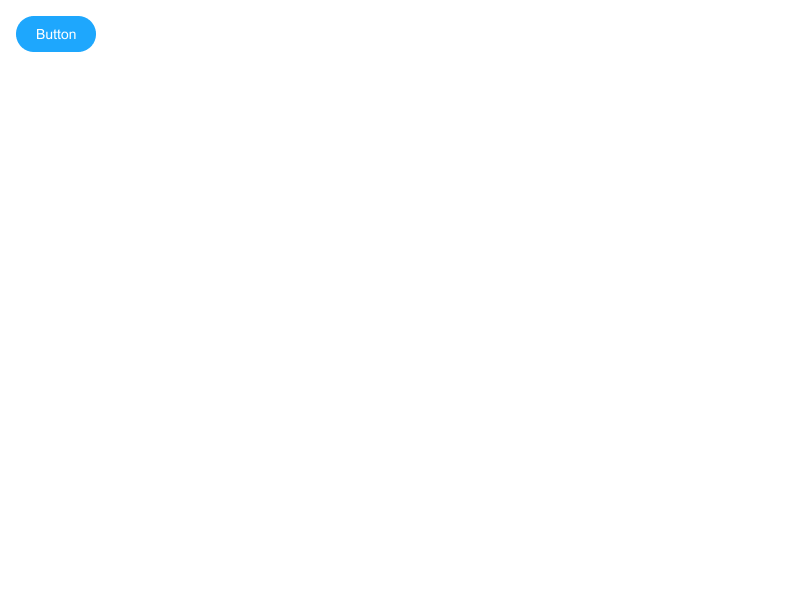

In [83]:
Image(filename=check_frame) 

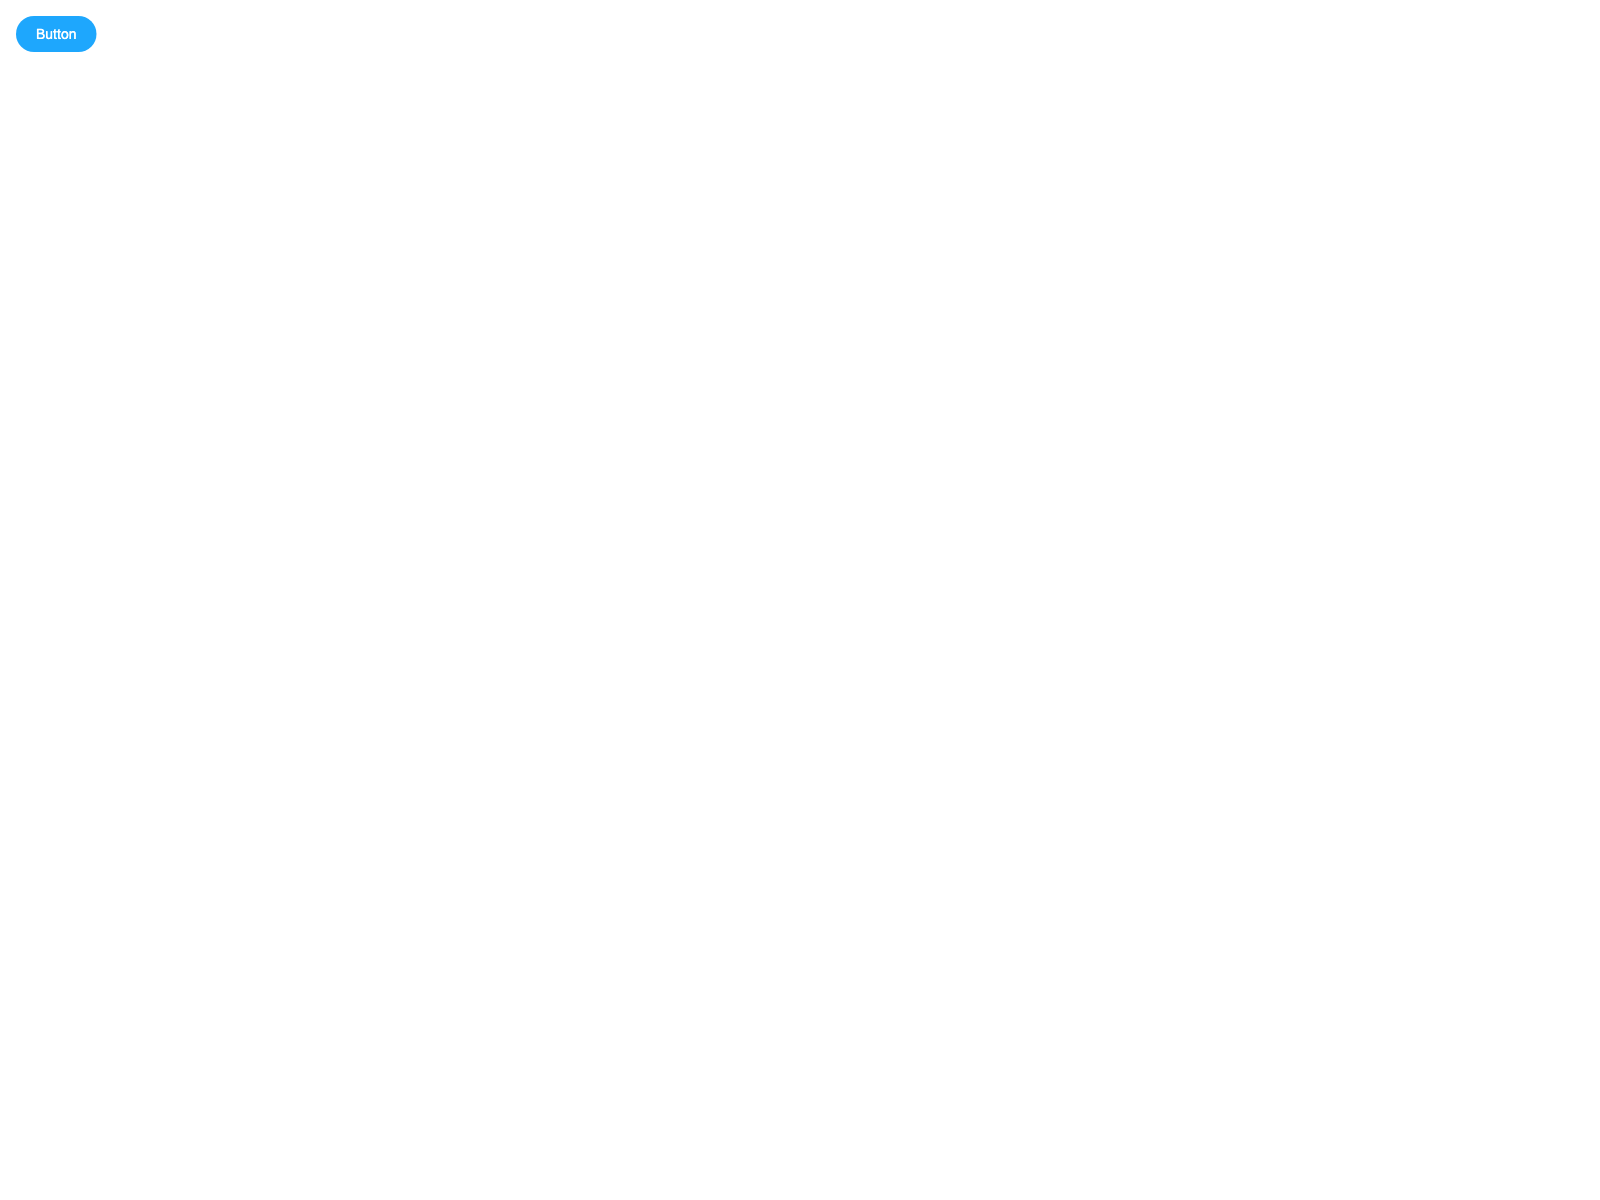

In [84]:
Image(filename=check_code_screenshot) 

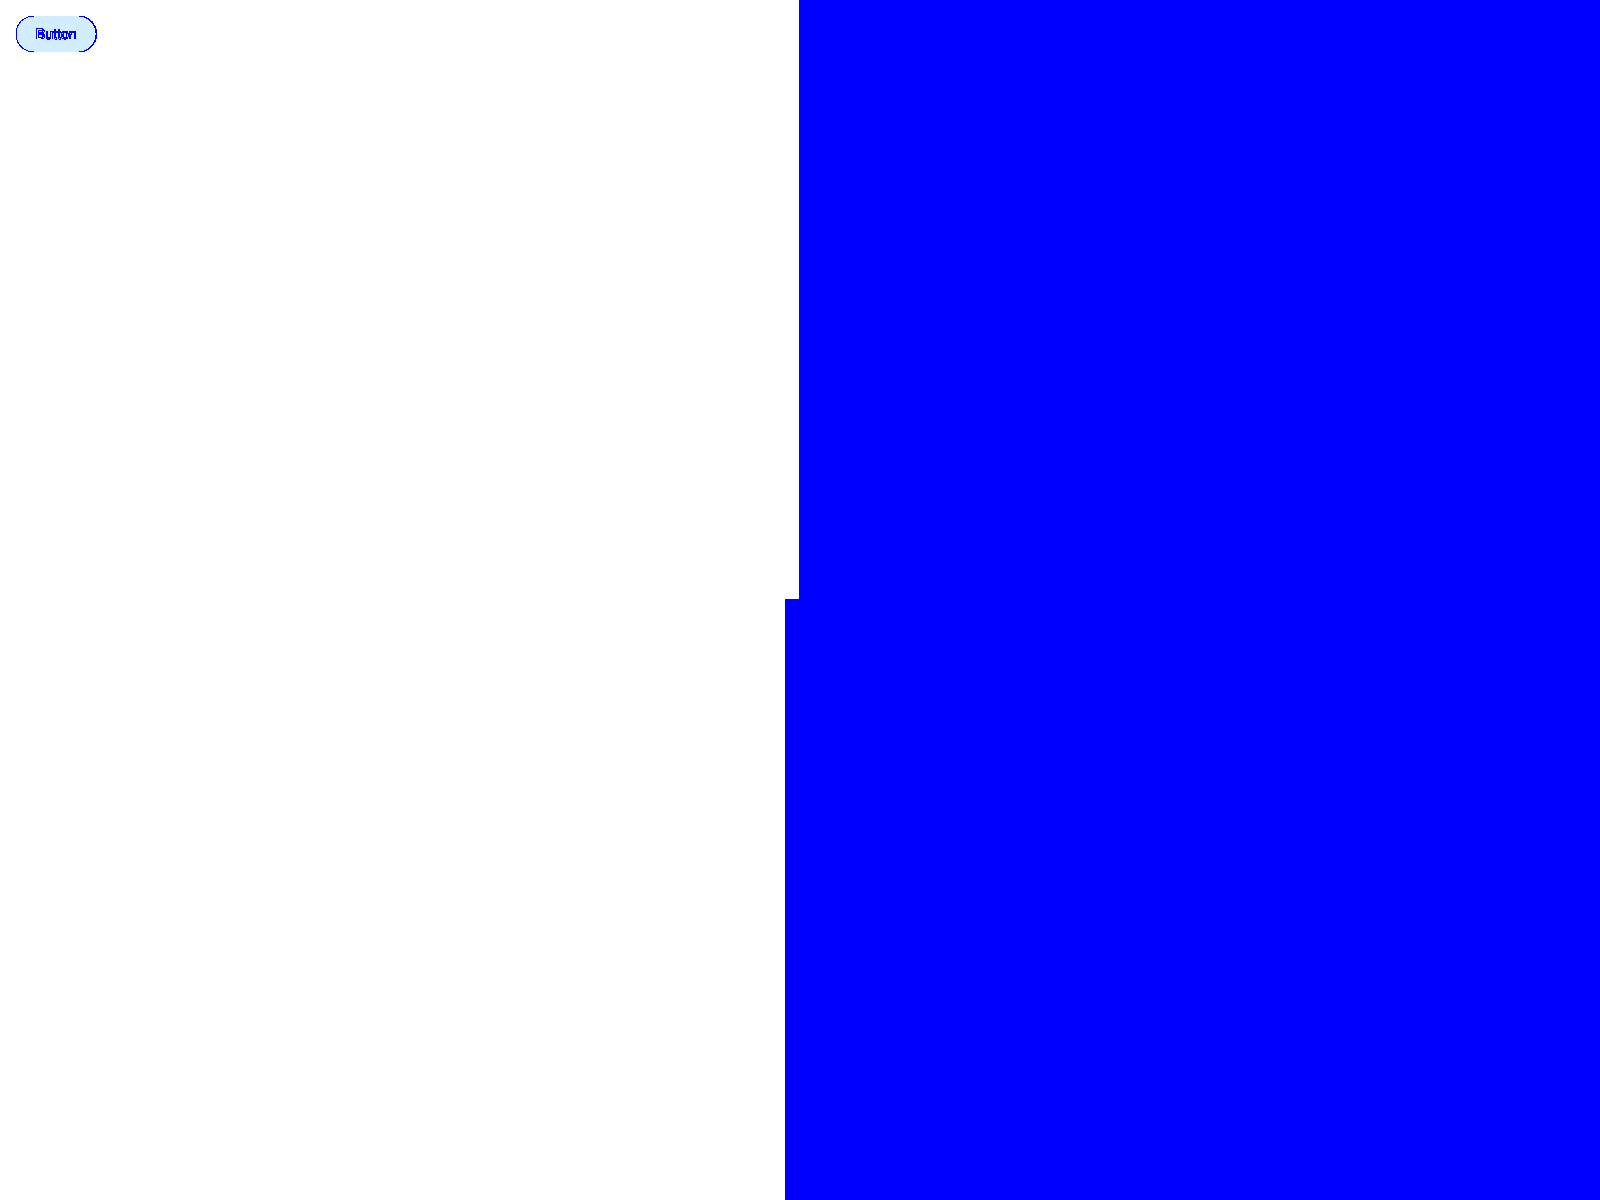

In [85]:
Image(filename=blue_difference) 

In [87]:
!aws s3 cp {blue_difference} s3://same-story/checks/{check_id}/report/{blue_difference}

upload: ./blue_difference.png to s3://same-story/checks/1644302997171/report/blue_difference.png


In [88]:
gray_difference = "gray_difference.png"

In [100]:
!convert $check_code_screenshot -flatten -grayscale Rec709Luminance $check_frame -flatten -grayscale Rec709Luminance -clone 0-1 -compose darken -composite -channel RGB -combine $gray_difference

In [102]:
!aws s3 cp {gray_difference} s3://same-story/checks/{check_id}/report/{gray_difference}

upload: ./gray_difference.png to s3://same-story/checks/1644302997171/report/gray_difference.png


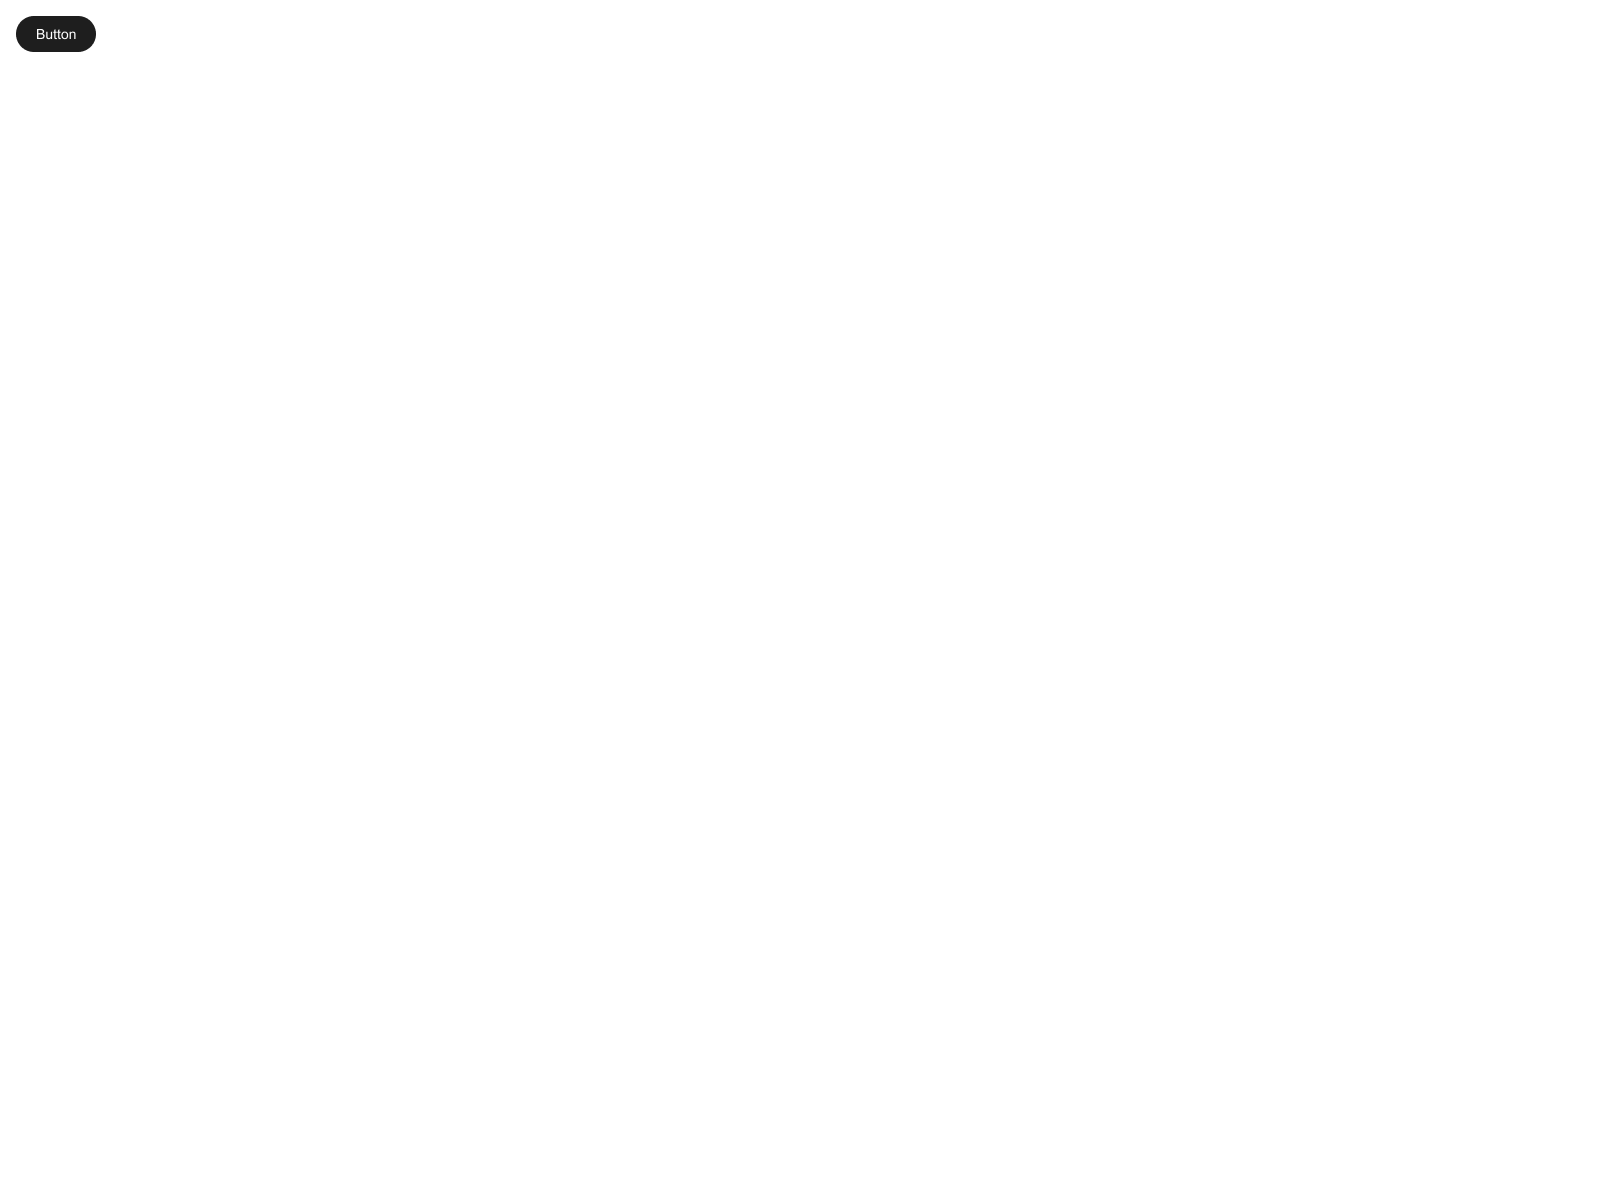

In [103]:
Image(filename=gray_difference) 

In [107]:
out = !compare -metric MAE {check_code_screenshot} {check_frame} null

In [115]:
json.dump({"MAE": out[0]}, open("results.json", "w"))

In [116]:
!aws s3 cp results.json s3://same-story/checks/$check_id/report/results.json

upload: ./results.json to s3://same-story/checks/1644302997171/report/results.json


In [28]:
f1 = "./$/var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmpqekyexgc/same-story/checks/1644302997171/frames/Button-Primary.png"
f2 = "./$/var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmpqekyexgc/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png"

In [29]:
out = !compare -metric MAE {f1} {f2} null

In [30]:
out

['195.025 (0.00297589)']

In [39]:
%run ../server/check.py

In [40]:
retval = await run(f"compare -metric MAE {f1} {f2} null")

2022-03-19 10:20:31 root                      INFO     [stderr]
195.025 (0.00297589)
2022-03-19 10:20:31 root                      INFO     'compare -metric MAE ./$/var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmpqekyexgc/same-story/checks/1644302997171/frames/Button-Primary.png ./$/var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T/tmpqekyexgc/same-story/checks/1644302997171/report/__screenshots__/Example/Button/Primary.png null' exited with code 1 elapsed 0.3246117500002583 seconds


In [41]:
retval

(1, b'', b'195.025 (0.00297589)')

In [ ]:
# aws s3 cp s3://same-story/checks/1644302997171

In [56]:
import socket
sock = socket.socket()
sock.bind(('', 0))
sock.getsockname()[1]

65362

In [61]:
import tempfile
tempfile.gettempdir()

'/var/folders/d9/ys4dflhn1txdhj53rwrj2x340000gn/T'